**INTL6: Inteligência Artificial (2021.2)** <br/>
IFSP Campinas

Prof: Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
# pacotes usados neste notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# estilos padrão para os plots/visualizações
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

<h1>Especificação</h1><hr/>

Neste notebook, realizaremos uma **Análise Exploratória de Dados** em um conjunto de dados sobre aplicativos da Google Play Store. <br/>
Nosso objetivo é responder algumas perguntas e hipóteses sobre o dataset. Para isso, analisaremos as variáveis do dataset em diferentes cenários, utilizando um ferramental que envolve a manipulação de dados, estatísticas descritivas e visualizações. <br/>
Focaremos mais nas estratégias de como responder às perguntas do que necessariamente no código para chegar nisso. Deixaremos a cargo de vocês o entendimento do ferramental. <br/>

Como suporte para visualização:
- https://datavizcatalogue.com/
- https://www.python-graph-gallery.com/

<h2>1. Dataset</h2>
<hr/>

**Dataset**: Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps <br/>

Este dataset contém dados sobre aplicativos da Google Play Store (2010 até agosto de 2018). <br/>
Cada *observação (registro/linha)* consiste de informações de um app, tais como categoria, avaliação, tamanho, entre outros. <br/>
Cada app possui uma avaliação (coluna 'Rating') que consiste da nota média de um conjunto de avaliações (coluna 'Reviews').

### 1.1 Importando o Dataset

In [2]:
df = pd.read_csv('./datasets/googleplaystore_preprocessado.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### 1.2 Informações básicas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8194 non-null   object 
 1   Category        8194 non-null   object 
 2   Rating          8194 non-null   float64
 3   Reviews         8194 non-null   int64  
 4   Size            8194 non-null   float64
 5   Installs        8194 non-null   int64  
 6   Type            8194 non-null   object 
 7   Price           8194 non-null   float64
 8   Content Rating  8194 non-null   object 
 9   Genres          8194 non-null   object 
 10  Last Updated    8194 non-null   object 
 11  Current Ver     8194 non-null   object 
 12  Android Ver     8194 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 832.3+ KB


<br/>

O dataset pré-processado possui **8194** registros/observações/linhas e **13** atributos/variáveis/colunas.
Nenhum atributo possui valores NaN.

<h2>2. Análise Exploratória de Dados</h2>
<hr/>

**Estatísticas descritivas básicas**

In [5]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


## 2.1 Quais são os 10 Apps mais baixados?
Para analisar quais são os apps mais baixados, ordenaremos os registros pela coluna "Installs". Em caso de empate, desempataremos pela _avaliação_ dos aplicativos, ou seja, realizaremos uma nova ordenação pela coluna "Rating".

In [6]:
top10_apps_mais_baixados = df.sort_values(by=['Installs', 'Rating'], ascending=[False, False]).head(10)
top10_apps_mais_baixados

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1276,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
1873,Instagram,SOCIAL,4.5,66577313,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-31,1.0.0,Varies with device
2061,Google Photos,PHOTOGRAPHY,4.5,10858556,10500000.0,1000000000,Free,0.0,Everyone,Photography,2018-08-06,1.0.0,Varies with device
288,WhatsApp Messenger,COMMUNICATION,4.4,69119316,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,1.0.0,Varies with device
2377,Google,TOOLS,4.4,8033493,4100000.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,1.0.0,Varies with device
2588,Google Drive,PRODUCTIVITY,4.4,2731171,7000000.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,1.0.0,Varies with device
290,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
292,Gmail,COMMUNICATION,4.3,4604324,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,1.0.0,Varies with device
651,Google Play Games,ENTERTAINMENT,4.3,7165362,19000000.0,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,1.0.0,Varies with device
2290,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,19000000.0,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,1.0.0,Varies with device


Text(0.5, 1.0, 'Top 10 Apps mais baixados')

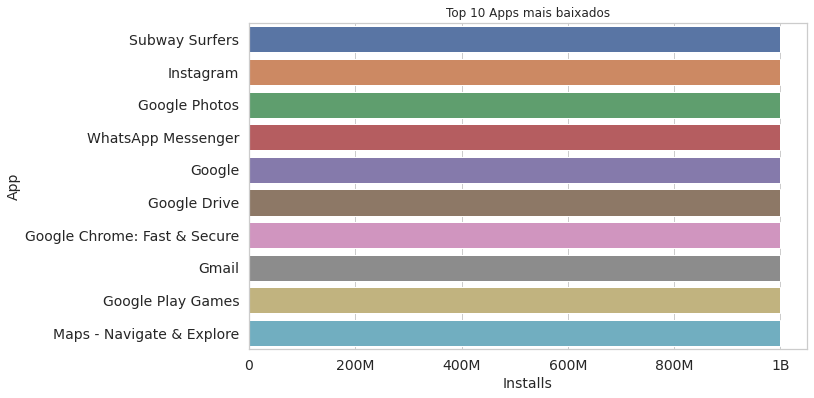

In [7]:
sns.barplot(data=top10_apps_mais_baixados, x='Installs', y='App')
plt.xticks([0, 0.2e9, 0.4e9, 0.6e9, 0.8e9, 1e9], ['0', '200M', '400M', '600M', '800M', '1B'])
plt.title('Top 10 Apps mais baixados')

### 2.2 Qual a quantidade de aplicativos por categoria?

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [9]:
df.value_counts(subset='Category')

Category
FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
dtype: int64

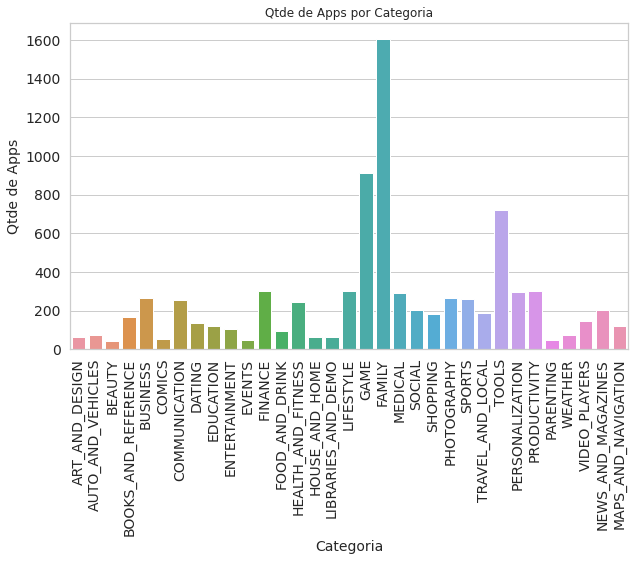

In [10]:
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Qtde de Apps')
plt.title('Qtde de Apps por Categoria')
display()

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

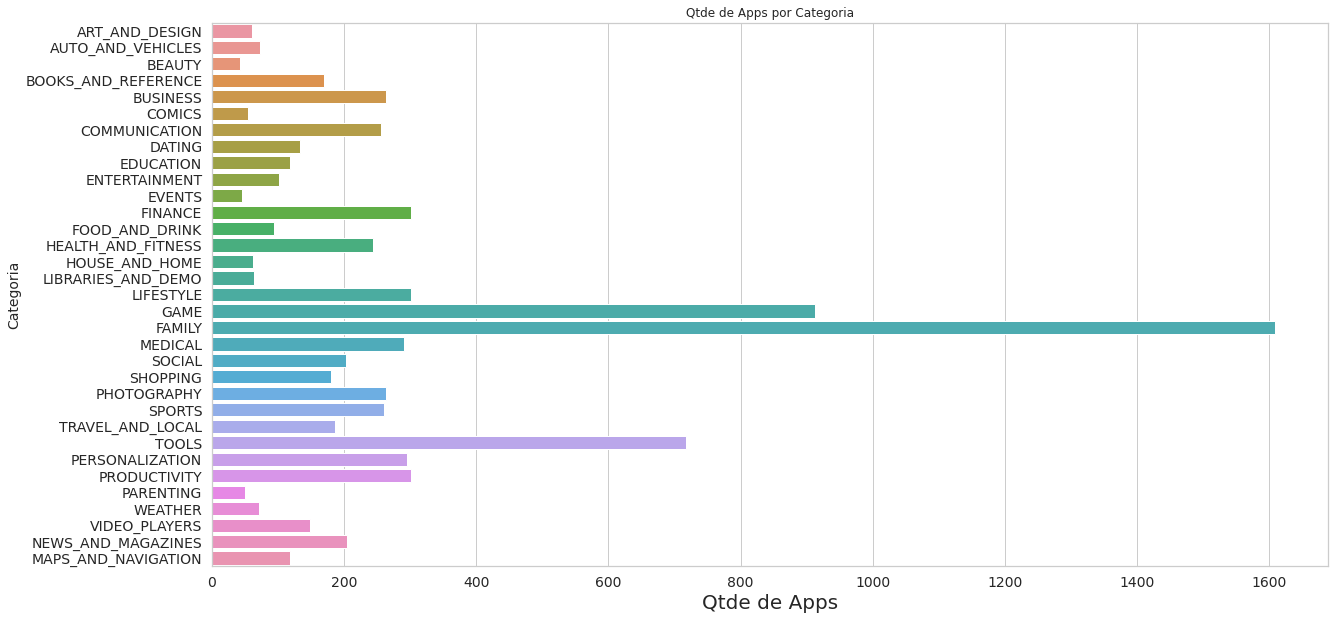

In [11]:
plt.figure(figsize=(20, 10))

sns.countplot(data=df, y='Category')
plt.xlabel('Qtde de Apps', fontsize=20)
plt.ylabel('Categoria')
plt.title('Qtde de Apps por Categoria')

A distribuição das barras não está **ordenada**. Para ordená-las, precisamos passar a lista de nomes da 'Category' na orde que queremos visualizar.

Neste caso, vamos visualizar as barras em **ordem decrescente** da quantidade de apps por categoria.

In [12]:
order = df.value_counts(subset='Category').index
order

Index(['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'PRODUCTIVITY',
       'PERSONALIZATION', 'MEDICAL', 'BUSINESS', 'PHOTOGRAPHY', 'SPORTS',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'TRAVEL_AND_LOCAL', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS',
       'DATING', 'EDUCATION', 'MAPS_AND_NAVIGATION', 'ENTERTAINMENT',
       'FOOD_AND_DRINK', 'AUTO_AND_VEHICLES', 'WEATHER', 'LIBRARIES_AND_DEMO',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'COMICS', 'PARENTING', 'EVENTS',
       'BEAUTY'],
      dtype='object', name='Category')

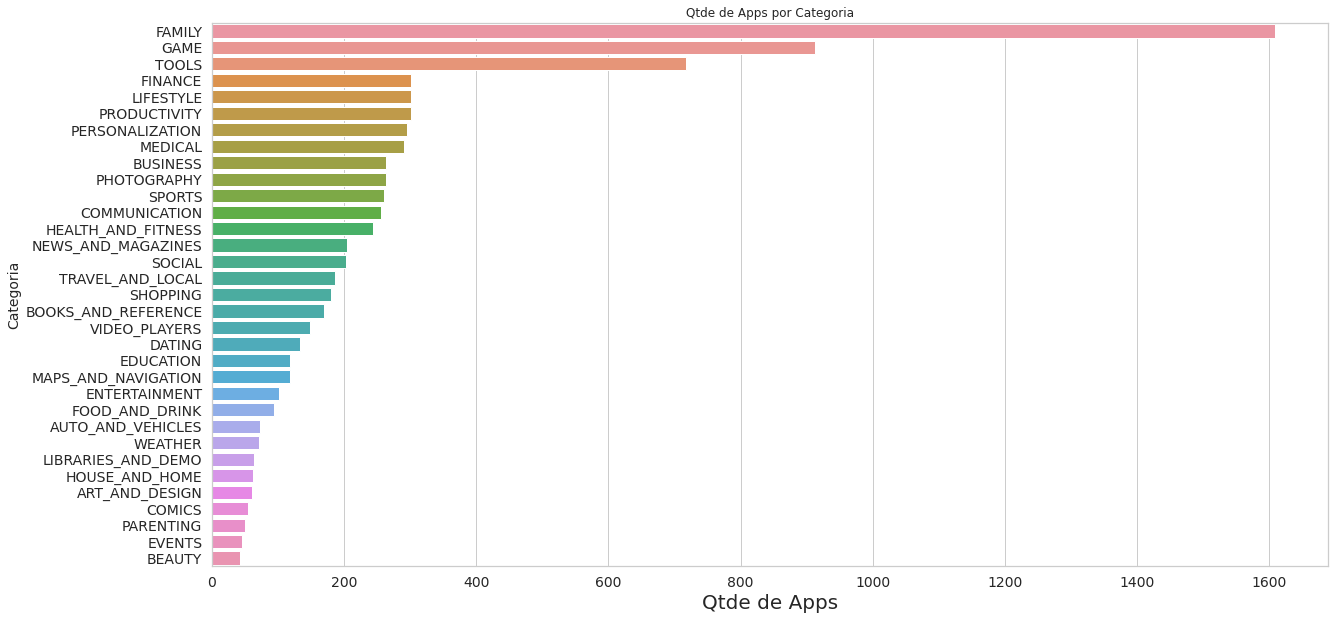

In [13]:
plt.figure(figsize=(20, 10))

sns.countplot(data=df, y='Category', order=order)
plt.xlabel('Qtde de Apps', fontsize=20)
plt.ylabel('Categoria')
plt.title('Qtde de Apps por Categoria')

display()  # omite saída de texto na tela vindas da biblioteca de plot

As cores ilustradas no plot _não têm qualquer significado_ (nenhuma variável foi codificada usando cor).

### 2.3 Como se comportam as avaliações dos aplicativos? (tendências centrais, distribuição, etc)

In [16]:
stats = df.describe()
stats

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [18]:
df['Rating'].describe()

count    8194.000000
mean        4.173175
std         0.536672
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Note que a **média** e a **mediana** não estão muito longe e que o **desvio padrão** não é tão alto, mesmo com uma escala tão baixa com é a das avaliações (de 1 a 5). Tudo isso indica (em números) que a dispersão de notas/avaliações dos aplicativos não é tão grande.

#### HISTOGRAMA

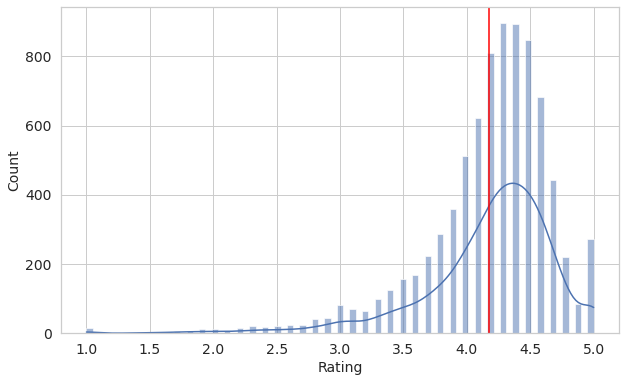

In [22]:
sns.histplot(data=df, x='Rating', kde=True)
plt.axvline(stats.loc['mean', 'Rating'], color='red')

A **distribuição das avaliações** tem semelhanças com um _distribuição normal_ enviesada à esquerda (skewed left distribution). <br/>

Apenas olhando este gráfico podemos notar que a grande maioria das avaliações estão no intervalo entre 4.0 e 5.0.

#### BOXPLOT

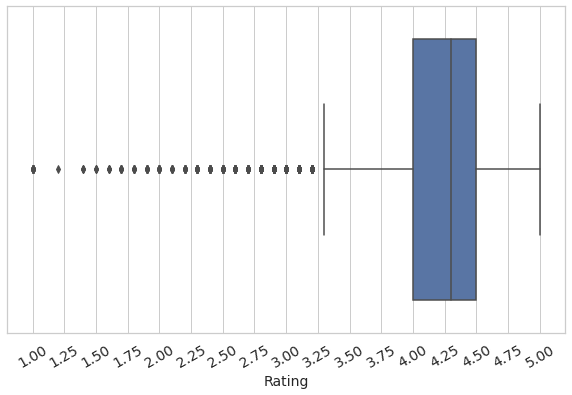

In [26]:
sns.boxplot(data=df, x='Rating')
plt.xticks(np.arange(1, 5.01, 0.25), rotation=30)
display()

Pelo boxplot, é possível enxergar que 50% dos dados estão entre as avaliações 4.0 (Q1) e 4.5 (Q3), confirmando os resultados vindos do método `.describe()`.

Por outro lado, ele interpretou que os aplicativos com avaliações _menores do que ~3.25_ são ***outliers*** da distribuição. <br/>
Entretanto, é comum termos aplicativos mal avaliados. Assim sendo, a inclusão destes aplicativos na análise é relevante.

In [35]:
# outliers
apps_com_rating_leq_3_25 = df.query('Rating <= 3.25')

In [36]:
apps_com_rating_leq_3_25

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700000.0,5000,Free,0.0,Everyone,Art & Design,2018-06-06,1.0.0,4.2 and up
86,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1100000.0,100000,Free,0.0,Everyone,Auto & Vehicles,2018-04-27,1.4,4.0.3 and up
199,Plugin:AOT v5.0,BUSINESS,3.1,4034,23000.0,100000,Free,0.0,Everyone,Business,2015-09-11,3.0.1.11 (Build 311),2.2 and up
264,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965,15000000.0,5000000,Free,0.0,Teen,Comics,2018-07-03,6.3.0,4.0.3 and up
265,Daily Manga - Comic & Webtoon,COMICS,3.2,1446,7100000.0,100000,Free,0.0,Mature 17+,Comics,2018-05-18,1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056,Florida Blue,HEALTH_AND_FITNESS,3.2,499,34000000.0,100000,Free,0.0,Everyone,Health & Fitness,2018-07-10,4.2.1,7.0 and up
8078,SB · FN 1870 Mobile Banking,FINANCE,2.9,139,3300000.0,10000,Free,0.0,Everyone,Finance,2017-06-19,3.0.5,4.0 and up
8084,Pint - FN Theme,PERSONALIZATION,2.5,6,234000.0,100,Free,0.0,Everyone,Personalization,2013-08-10,1.0,2.2 and up
8138,Fisher-Price® Smart Connect™,TOOLS,2.7,422,72000000.0,50000,Free,0.0,Everyone,Tools,2018-02-23,2.4.1,4.4 and up


<br/>

O boxplot do seaborn identifica outliers usando o método de detecção via IQR. Para tanto, ele considera como **outlier** qualquer valor fora do intervalo **\[Q1 - 1.5\*IQR, Q3 + 1.5\*IQR\]**. Podemos controlar o fator **1.5** alterando o parâmetro `whis`. <br/>

Se quisermos, por exemplo, que o boxplot não tenha _outliers_, basta passar um valor alto para o `whis`.

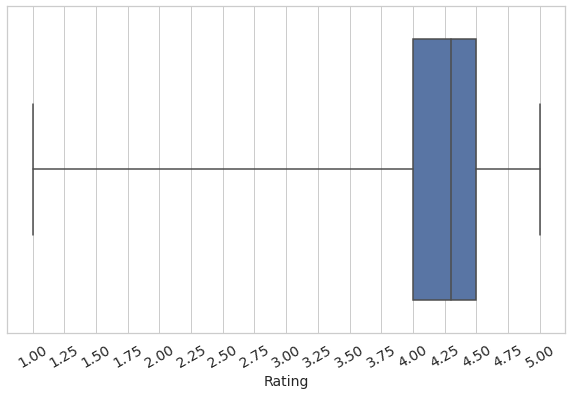

In [37]:
sns.boxplot(data=df, x='Rating', whis=10)
plt.xticks(np.arange(1, 5.01, 0.25), rotation=30)
display()

#### VIOLIN PLOT

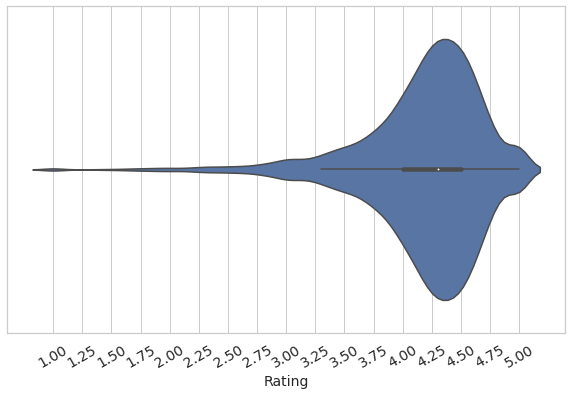

In [40]:
sns.violinplot(data=df, x='Rating')
plt.xticks(np.arange(1, 5.01, 0.25), rotation=30)
display()

O _violin plot_ nos dá uma noção mais precisa de como os dados estão distribuídos, principalmente, entre os quartis.

### 2.4 Qual categoria é a melhor avaliada?

In [50]:
stats = df.groupby('Category').describe()['Rating']
stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
BUSINESS,263.0,4.098479,0.659862,1.0,3.800,4.2,4.500,5.0
COMICS,54.0,4.181481,0.526317,2.8,3.900,4.4,4.500,5.0
COMMUNICATION,256.0,4.121484,0.470260,1.0,4.000,4.2,4.400,5.0
DATING,134.0,3.970149,0.637786,1.0,3.600,4.1,4.400,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9


Vamos considerar que as melhores categorias são aquelas que possuem as maiores **médias**.

In [52]:
stats.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
EVENTS,45.0,4.435556,0.419499,2.9,4.200,4.5,4.700,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
PERSONALIZATION,296.0,4.331419,0.360027,2.5,4.200,4.4,4.600,5.0
PARENTING,50.0,4.300000,0.517845,2.0,4.100,4.4,4.675,5.0
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
GAME,912.0,4.247368,0.384116,1.0,4.100,4.3,4.500,5.0
SOCIAL,203.0,4.247291,0.457209,1.9,4.100,4.3,4.500,5.0


Ao computar a _média das avaliações por categoria_ e ordenar pela **maior média**, constatamos que a categoria "EVENTS" possui a maior média. <br/>
Mas, **não** é possível afirmar que essa é a _categoria melhor avaliada **apenas olhando para estes resultados**_, pois **o tamanho de cada amostra/grupo** (i.e., a quantidade de aplicativos por categoria) é diferente. Além disso, o **desvio padrão** também muda de categoria para categoria.<br/>

P. ex., a categoria "EVENTS" possui 45 apps, enquanto "BOOKS_AND_REFERENCE" possui 169.

Precisaríamos rodar algum **teste estatístico específico**, p. ex., para ter essa certeza. <br/>

Outra meneira (mais simples), é garantir **a mesma quantidade de observações para cada grupo** (mesmo tamanho de amostra). <br/>
Para isso, assumiríamos o tamanho do menor grupo, suponha N, e, para cada grupo restante, selecionaríamos _aleatoriamente_ N observações. <br/>
Mas, e se, **ao acaso**, selecionamos apenas observações com uma dada característica que não, necessariamente, representasse bem nossa distribuição original? <br/>
Uma alternativa, é realizar essa seleção múltiplas vezes. Mas este é um assunto para depois.

Algumas discussões interessantes sobre o assunto: <br/>
- https://www.researchgate.net/post/Is_there_any_way_to_compare_two_datasets_with_drastically_different_sample_sizes#:~:text=Most%20recent%20answer&text=One%20way%20to%20compare%20the,the%20single%204%20sample%20set.
- https://stackoverflow.com/a/63099989
- https://www.statisticshowto.com/unequal-sample-sizes/
- https://www.graphpad.com/support/faq/how-to-compare-two-means-when-the-groups-have-different-standard-deviations/


Por ora, vamos simplificar e assumir que apenas analisar esses resultados é suficiente para decidirmos quais são as categorias melhores avaliadas.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

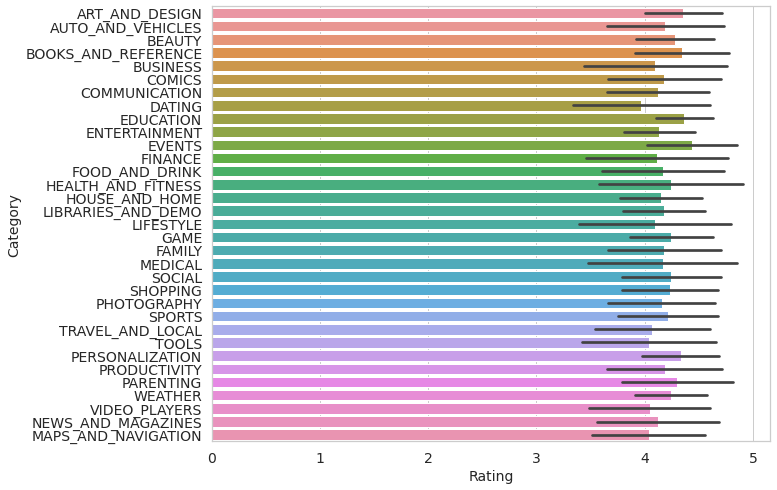

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Rating', y='Category', ci='sd')

In [62]:
# vamos ordenar essa visualização baseado na média das avaliações dos grupos
order = stats.sort_values(by='mean', ascending=False).index
order

Index(['EVENTS', 'EDUCATION', 'ART_AND_DESIGN', 'BOOKS_AND_REFERENCE',
       'PERSONALIZATION', 'PARENTING', 'BEAUTY', 'GAME', 'SOCIAL', 'WEATHER',
       'HEALTH_AND_FITNESS', 'SHOPPING', 'SPORTS', 'AUTO_AND_VEHICLES',
       'PRODUCTIVITY', 'COMICS', 'FAMILY', 'LIBRARIES_AND_DEMO',
       'FOOD_AND_DRINK', 'MEDICAL', 'PHOTOGRAPHY', 'HOUSE_AND_HOME',
       'ENTERTAINMENT', 'NEWS_AND_MAGAZINES', 'COMMUNICATION', 'FINANCE',
       'BUSINESS', 'LIFESTYLE', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'TOOLS',
       'MAPS_AND_NAVIGATION', 'DATING'],
      dtype='object', name='Category')

<AxesSubplot:xlabel='Rating', ylabel='Category'>

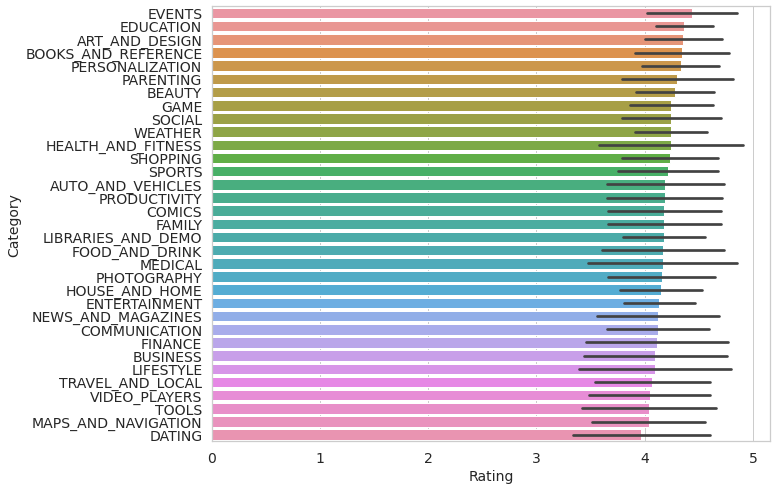

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Rating', y='Category', ci='sd', order=order)

Ao analisar o boxplot, podemos notar que algumas categorias (p.ex., 'HEALTH_AND_FITNESS') possuem um **desvio padrão** um pouco maior do que as demais categorias. <br/>
Vamos dar uma olhada na distribuição das notas de uma dessas categorias apenas para ter um sentimento do que está acontecendo.

<AxesSubplot:xlabel='Rating'>

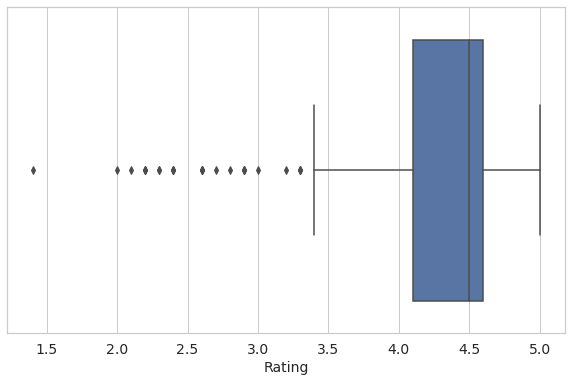

In [66]:
sns.boxplot(data=df.query('Category == "HEALTH_AND_FITNESS"'), x='Rating')

### 2.5 Como as avaliações se distribuem em cada categoria?
_Variável Numérica_ x _Variável Categórica_.

In [73]:
stats = df.groupby('Category').describe()['Rating']
stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
BUSINESS,263.0,4.098479,0.659862,1.0,3.800,4.2,4.500,5.0
COMICS,54.0,4.181481,0.526317,2.8,3.900,4.4,4.500,5.0
COMMUNICATION,256.0,4.121484,0.470260,1.0,4.000,4.2,4.400,5.0
DATING,134.0,3.970149,0.637786,1.0,3.600,4.1,4.400,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9


<AxesSubplot:xlabel='Rating', ylabel='Category'>

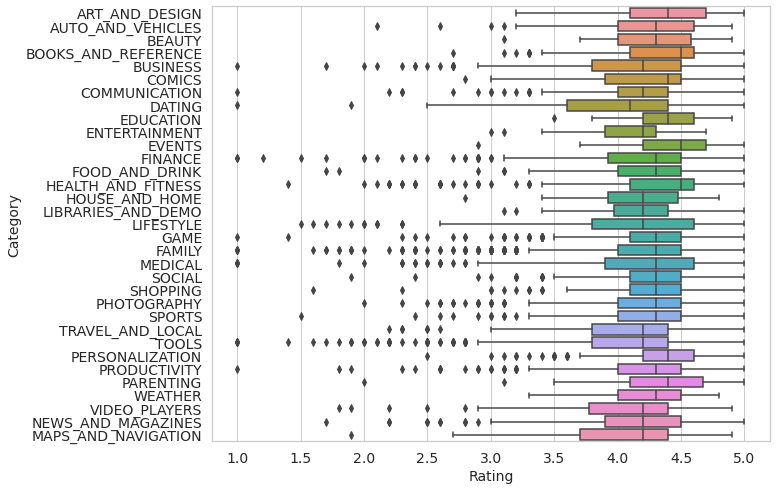

In [76]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Rating', y='Category')

Para obter uma análise visual mais interessante, podemos ordenar os boxplots (ou violion plots) de acordo com algum critério. <br/>
Por exemplo, podemos ordená-los pela _mediana_ de cada categoria a fim de analisar, p. ex., como estão distribuídos _a metade dos apps mais bem avaliados_ de cada categoria, além de **diminuir o impacto de outliers** na distribuição.

In [82]:
order = stats.sort_values(by='50%').index
order

Index(['DATING', 'HOUSE_AND_HOME', 'LIFESTYLE', 'MAPS_AND_NAVIGATION',
       'NEWS_AND_MAGAZINES', 'ENTERTAINMENT', 'VIDEO_PLAYERS',
       'LIBRARIES_AND_DEMO', 'BUSINESS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'COMMUNICATION', 'SOCIAL', 'PRODUCTIVITY', 'PHOTOGRAPHY', 'SPORTS',
       'MEDICAL', 'SHOPPING', 'WEATHER', 'GAME', 'FOOD_AND_DRINK', 'FINANCE',
       'FAMILY', 'BEAUTY', 'AUTO_AND_VEHICLES', 'PARENTING', 'PERSONALIZATION',
       'EDUCATION', 'COMICS', 'ART_AND_DESIGN', 'EVENTS',
       'BOOKS_AND_REFERENCE', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

<AxesSubplot:xlabel='Rating', ylabel='Category'>

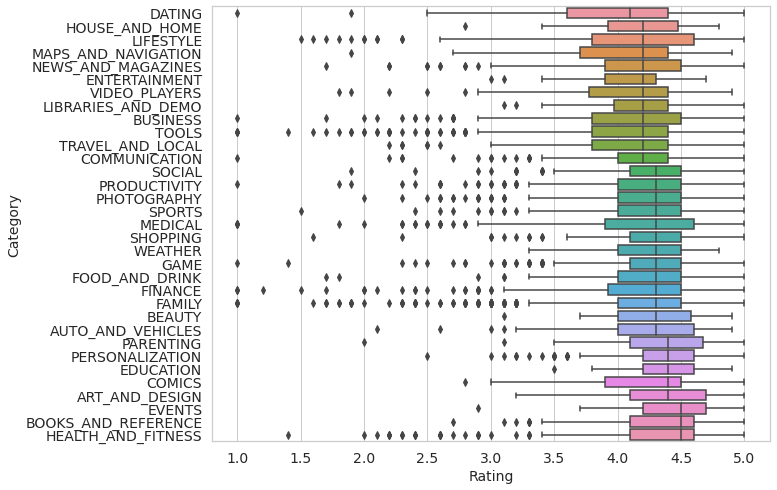

In [83]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Rating', y='Category', order=order)

Ao analisar os boxplots, vemos que as categorias *BOOKS_AND_REFERENCE* e *HEALTH_AND_FITNESS* possuem uma quantidade considerável de apps muito bem avaliados --- ~50% de seus apps possuem avaliação >= 4.5. Entretanto, a **variância** (dispersão) de suas avaliações é **muito alta**, vários _outliers_. <br/>

Vamos agora analisar o mesmo gráfico mas com as categorias organizadas pela **média** das avaliações.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

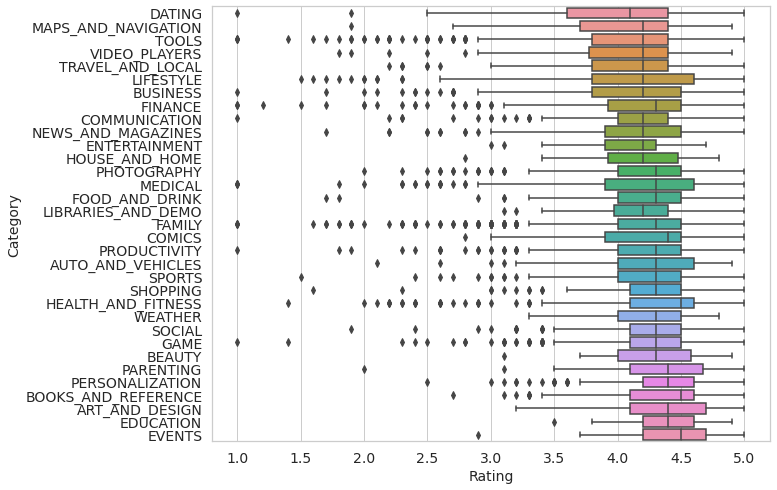

In [85]:
plt.figure(figsize=(10, 8))
order = stats.sort_values(by='mean').index
sns.boxplot(data=df, x='Rating', y='Category', order=order)

Note que como a **média** é _sensível a outliers_, as categorias 'BOOKS_AND_REFERENCES_ e, principalmente, 'HEALTH_AND_FITNESS_ perderam posições. Categorias bem avaliadas e com poucos outliers (p. ex., 'EDUCATION' e 'EVENTS') apresentam médias maiores.

Em resumo, esta maneira de organizar e visualizar este gráfico é interessante quando você quer considerar o impacto dos outliers da variável analisada. A visualização anterior, ordenando pelas medianas, visa o oposto.

### 2.6 Qual a média e distribuição de downloads/instalações dos apps em geral?

#### **CONSIDERANDO OS APPS MAIS POPULATES (_"OUTLIERS"_)**
Vamos considerar que: **Mais popular** significa **mais instalado**

In [89]:
stats= df.describe()
stats

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


Embora a escala da variável é muito alta ([1, 1B]), note como o **desvio padrão** é consideravelmente alto, o que indica que a _distribuição de instalações seja bem espalhada_. <br/>


<AxesSubplot:xlabel='Installs'>

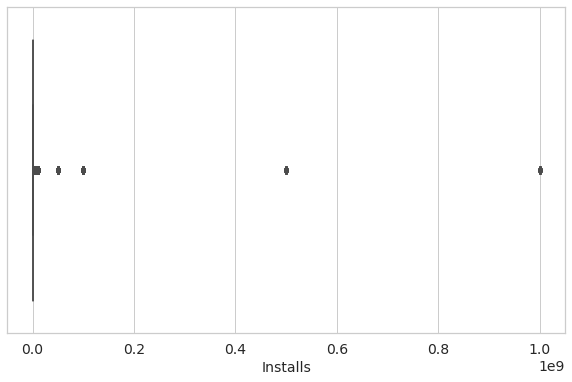

In [106]:
sns.boxplot(data=df, x='Installs')

De acordo com o boxplot acima, temos _uma pequena quantidade de apps_ que possuem uma **quantidade muito alta** de instalações ==> _outliers_. <br/>

In [94]:
# recuperando os 10 apps mais baixados (sem considerar nenhum critério de desempate)
# queremos saber apenas alguns exemplos
df.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1873,Instagram,SOCIAL,4.5,66577313,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-31,1.0.0,Varies with device
2377,Google,TOOLS,4.4,8033493,4100000.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,1.0.0,Varies with device
292,Gmail,COMMUNICATION,4.3,4604324,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,1.0.0,Varies with device
293,Hangouts,COMMUNICATION,4.0,3419249,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,1.0.0,Varies with device
2588,Google Drive,PRODUCTIVITY,4.4,2731171,7000000.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,1.0.0,Varies with device
290,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
288,WhatsApp Messenger,COMMUNICATION,4.4,69119316,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,1.0.0,Varies with device
287,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
2290,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,19000000.0,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,1.0.0,Varies with device
1882,Google+,SOCIAL,4.2,4831125,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-26,1.0.0,Varies with device


In [99]:
df.query('Installs == 1000000000').shape

(20, 13)

De fato, os outliers são aplicativos extremamente populares e baixados.

Podemos então fazer alguns tipos de análise frente a esta situação:
- Analisamos como os outliers (apps mais instalados) se comportam
- Analisamos os apps menos instalados (desconsideramos os outliers)

Para descobrir os outliers, poderíamos analisar o _boxplot_ e simplesmente "chutar" qual é o intervalo de valores que os outliers se encontram. <br/>
Porém, uma forma mais interessante é utilizar, inicialmente, o **método de detecçao de outliers pelo IQR**, que é justamente o método utilizado pelo boxplot acima.

In [100]:
stats

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [102]:
Q1 = stats.loc['25%', 'Installs']
Q3 = stats.loc['75%', 'Installs']

IQR = Q3 - Q1

# intervalo sem outliers
limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')
print(f'IQR = {IQR}')
print(f'Intervalo sem outliers = [{limite_inferior}, {limite_superior}]')

Q1 = 10000.0
Q3 = 1000000.0
IQR = 990000.0
Intervalo sem outliers = [-1475000.0, 2485000.0]


Como o número mínimo de instalações é 0, nosso **intervalo sem outliers real** é **[0, 2485000]**. <br/>
Assim, os apps mais populares, com mais de 2485000 instalações, são considerados _outliers_.

In [109]:
# outliers
apps_mais_populares = df.query('Installs > @limite_superior')
apps_mais_populares

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000000.0,10000000,Free,0.0,Teen,Art & Design,2018-04-02,3.8,4.1 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8127,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400000.0,10000000,Free,0.0,Everyone,Photography,2017-06-03,4.0.7.0,2.3 and up
8152,Modern Strike Online,GAME,4.3,834117,44000000.0,10000000,Free,0.0,Teen,Action,2018-07-30,1.25.4,4.1 and up
8155,Big Hunter,GAME,4.3,245455,84000000.0,10000000,Free,0.0,Everyone 10+,Action,2018-05-31,2.8.6,4.0 and up
8182,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,9900000.0,5000000,Free,0.0,Mature 17+,Social,2018-03-23,1.0.0,Varies with device


Temos um total de **1978** apps com mais de **2485000** instalações.

#### **Analisando os apps mais populares**

In [110]:
stats_apps_mais_populares = apps_mais_populares.describe()
stats_apps_mais_populares

,Rating,Reviews,Size,Installs,Price
count,1978.000000,1.978000e+03,1.978000e+03,1.978000e+03,1978.000000
mean,4.289130,1.029147e+06,2.687222e+07,3.706016e+07,0.004034
std,0.293063,3.943505e+06,2.430535e+07,1.141864e+08,0.158725
min,2.000000,6.600000e+01,4.100000e+04,5.000000e+06,0.000000
25%,4.200000,7.912975e+04,9.200000e+06,5.000000e+06,0.000000
50%,4.300000,2.104255e+05,1.800000e+07,1.000000e+07,0.000000
75%,4.500000,6.201300e+05,4.000000e+07,1.000000e+07,0.000000
max,4.900000,7.815831e+07,1.000000e+08,1.000000e+09,6.990000


O **desvio padrão** dos _apps mais populares_ continua bem alto, o que indica que a distribuição do número de instalações é bem espalhada. <br/>
Além disso, note que a **média** e **mediana** do número de instalações são _muito diferentes_.

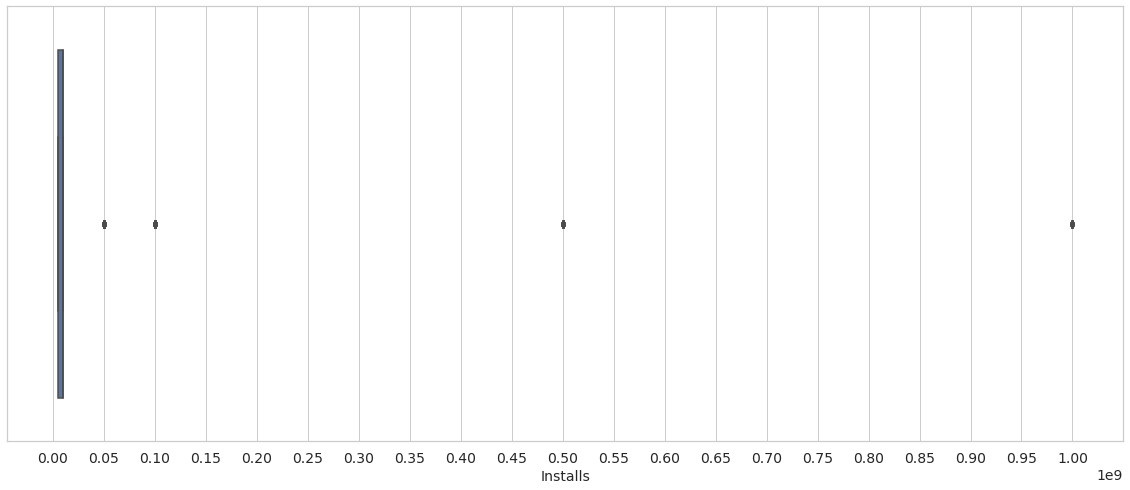

In [114]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=apps_mais_populares, x='Installs')
plt.xticks(np.arange(0.0e9, 1.0001e9, 0.05e9))
display()

Note que, mesmo entre os _aplicativos mais populares_ -- aqueles que possuem **número de instalações maior que 2485000** -- há alguns que extrapolam o número de instalações (**_outliers_**). <br/>
Pelo boxplot, é possível chutar que qualquer app com mais do que 50M (0.05e9) são de fato **_outliers_**. <br/>

Vamos analisar o **histograma** dos apps mais populares.

<AxesSubplot:xlabel='Installs', ylabel='Count'>

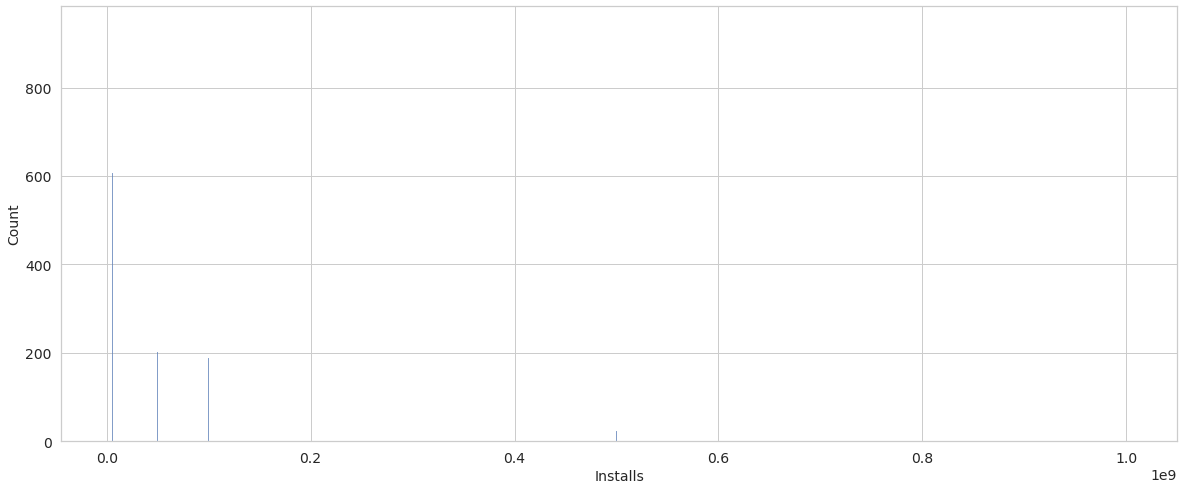

In [115]:
plt.figure(figsize=(20, 8))
sns.histplot(data=apps_mais_populares, x='Installs')

De fato, vemos que a maior parte dos apps mais populares possuem número de instalações inferior a 50M (0.05e9). <br/>

Poderíamos estabelecer um **novo intervalo** de número de instalações para detectar _outliers_ (apps mais populares). O novo intervalo poderia ser **[0, 50000000)**, ao invés de [0, 2485000). <br/>
Consequentemente, diminuiríamos o número de apps inicialmente considerados outliers e aumentaríamos a quantidade dos apps "normais" (menos populares). <br/>

O problema é que, provavelmente, estes _apps removidos dos outliers iniciais_ serão **outliers** na nova amostra de apps "normais". <br/>
Analisemos o boxplot deste conjunto:

<AxesSubplot:xlabel='Installs'>

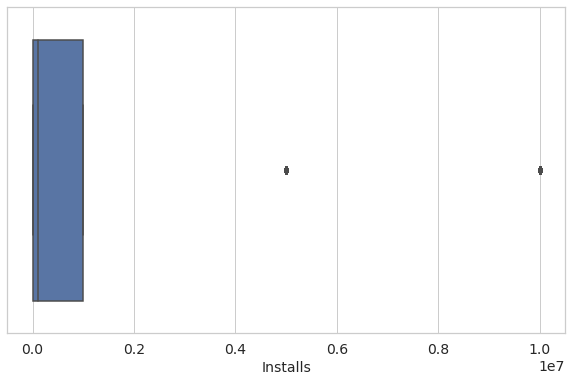

In [116]:
sns.boxplot(data=df.query('Installs < 50000000'), x='Installs')

Ainda temos 'outliers' dentro da amostra de **'novos outliers'** ==> alta variância.

No _novo conjunto de apps menos populares_, temos agora **outliers**, que  são, justamente, os novos apps considerados. <br/>

<AxesSubplot:xlabel='Installs'>

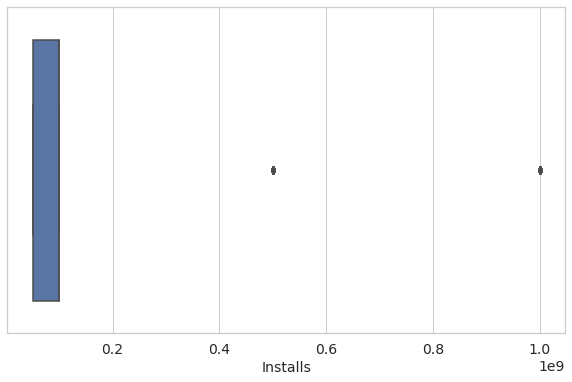

In [117]:
sns.boxplot(data=df.query('Installs >= 50000000'), x='Installs')

Dado este dilema, vamos adotar a seguinte estratégia: <br/>
- Como o **conjunto de apps mais populares** (outliers iniciais) continuam com **alta variância** no _número de instalações_, independente se removermos seus apps com menos de 50M instalações, **manteremos** o conjunto de outliers originalmente obtidos como está. <br/>
- Isso porque, neste momento, estamos interessados _apenas_ na análise de uma **única variável: _Installs_**. <br/>
- Desta forma, mantemos um conjunto de apps de fato _sem outliers_ (apps menos populares) para uma análise menos "ruidosa".

Uma estratégia mais interessante ao querer confrontar/analisar **o número de instalações** com outra variável é agrupar os apps, de acordo com suas quantidades de downloads, em uma **nova variável categórica**. <br/>
Isso tende _a facilitar nossa análise_, p. ex., isolando grupos de apps com números exorbitantes de instalação. <br/>
Veremos isso jajá!

#### **Analisando a quantidade de instalação dos apps menos populares (menos instalados)**

In [119]:
limite_superior

2485000.0

In [120]:
apps_menos_populares = df.query('Installs <= @limite_superior')
apps_menos_populares

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
8189,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
8190,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
8191,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up


In [122]:
stats_apps_menos_populares = apps_menos_populares.describe()
stats_apps_menos_populares

,Rating,Reviews,Size,Installs,Price
count,6216.000000,6216.000000,6.216000e+03,6216.000000,6216.000000
mean,4.136277,9071.399453,1.872636e+07,291516.141892,1.366961
std,0.588830,22620.037305,2.014875e+07,406097.228321,19.346041
min,1.000000,1.000000,8.500000e+03,1.000000,0.000000
25%,3.900000,56.000000,4.500000e+06,5000.000000,0.000000
50%,4.200000,656.000000,1.100000e+07,50000.000000,0.000000
75%,4.500000,7006.000000,2.500000e+07,500000.000000,0.000000
max,5.000000,376223.000000,1.000000e+08,1000000.000000,400.000000


O **desvio padrão** das instalações ainda é consideravelmente alto, mas bem menor do que para os _apps mais instalados_. <br/>
A diferença entre a **média** e a **mediana** das instalações é _menor_ do que para os _apps mais instalados_ também. <br/>

Apenas analisando estas estatísticas descritivas, percebemos que os números de instalação destes apps são bem distribuídos, mas em um intervalo bem menor do que para _apps mais instalados_.

<AxesSubplot:xlabel='Installs'>

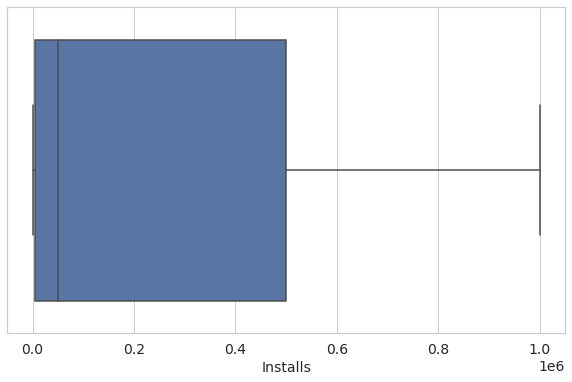

In [125]:
sns.boxplot(data=apps_menos_populares, x='Installs')

Dos apps menos populares:
- **25% (Q1)** possuem apps com número de instalações **<= 5000** (veja a tabela de describe)
- **50% (Q2 - mediana)** possuem apps com número de instalações **<= 50000** (veja a tabela de describe)
- **75% (Q3)** possuem apps com número de instalações **<= 500000** (veja a tabela de describe)
- **25%** possuem apps com número de instalações **> 500000 e <= 1M**

- **25%** possuem apps com número de instalações espalhados no intervalo de **[Q1, Q2] ==> [5000, 50000]**
- **25%** possuem apps com número de instalações espalhados no intervalo de **[Q2, Q3] ==> [50000, 500000]**
  + **maior variância (dispersão)** dos dados do que o caso anterior

<AxesSubplot:xlabel='Installs'>

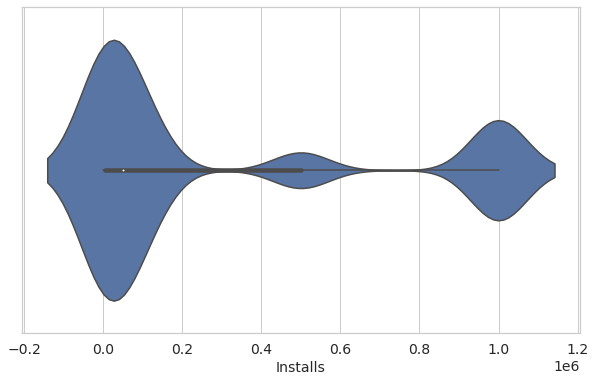

In [126]:
sns.violinplot(data=apps_menos_populares, x='Installs')

Dos **25% de apps mais instalados**, a maioria deles possuem número de instalações perto de **1M**.

### 2.7 Criando grupos para a quantidade de instalações 
Vamos agrupar os aplicativos de acordo com seus **números de instalações**. <br/>
Este processo é conhecido como **segmentação**: criaremos intervalos de valores (bins) para representar cada grupo. <br/>
Em outras palavras, segmentaremos o intervalo original, de modo que cada grupo terá um segmento (sub-intervalo).

Vamos adotar as seguintes categorias/grupos para o **número de instalações**:
- **Muito Baixo**: [0, 1k] instalações
- **Baixo**: (1k, 10k] instalações
- **Médio**: (10k, 100k] installações 
- **Alto**: (100k, 1M]
- **Muito Alto**: (1M, 100M]
- **Extremamente Alto**: (100M,)

PS: esta é apenas uma sugestão de segmentação. Outras opções poderiam ser levadas em conta.

Para criar estas categorias (segmentos, bins) a partir de intervalos numéricos, podemos utilizar o método `pd.cut()` do pandas: # https://pandas.pydata.org/docs/reference/api/pandas.cut.html

Após a segmentação/agrupamento, conseguimos notar que os dois maiores grupos possuem um número **alto** ou **muito alto** de instalações, enquanto apenas um pequeno número de aplicativos possui um valor **extremamente alto** de instalações. <br/>
Mais quais são esses números?

#### Pie plot

O uso do gráfico de pizza é um pouco _controverso_, uma vez que as **diferenças entre áreas** não são tão perceptíveis do que as **diferenças entre alturas** em um gráfico de barras. <br/>
P. ex., por este gráfico, como saber qual área é maior: _Alto_ ou _Muito Alto_??? _Médio_ ou _Baixo_? <br/>
Desta maneira, no geral o **gráfico de barras** é preferível.

Mas, podemos tentar melhorar o gráfico de pizza adicionando os números de registros de cada fatia:

### 2.8 Qual é a proporção de apps Free e Paid?

### 2.9 Qual é avaliação média de cada tipo de aplicativo?
Variável numérica x Variável Categórica.

#### VISUALIZANDO A DISTRIBUIÇÃO DE NOTAS POR APLICATIVO

##### RIDGE LINE

Por mais que a **proporção** de apps gratuitos e pagos sejam bem diferentes, ao analisar as estatísticas descritivas e os plots, conseguimos afirmar que a _distribuição de avaliações_ de cada tipo é similar, sendo os aplicativos pagos ligeiramente melhor avaliados do que os apps gratuitos.

### 2.10 Qual é distribuição de avaliações de cada tipo de aplicativo de acordo com a quantidade de instalações?
Comparação de 3 variáveis: uma numérica e duas categóricas.

Alguns insights/conlusões:
- No geral, a grande maioria dos apps gratuitos e pagos (~75%) possui avaliações próximas de 3.75 para cima, independente do número de instalações.
- Não temos **apps pagos** que foram **extremamente baixados** (> 100M)
- Não temos a escala de preços, mas faz sentido pensar que quanto maior o preço do app, menor o número de instalações (analisaremos essa hipótese depois)
- Apps gratuitos com número de instalação 'Muito Alta' e 'Extremamente Alta' possuem menor variância entre as avaliações, ou seja, a percepção dos usuários é parecida em cada categoria.
- Apps pagos com número de instalação 'Alta' e 'Muito Alta' possuem menor variância entre as avaliações, ou seja, a percepção dos usuários é parecida em cada categoria.
- Apps com número _'Muito Baixo' de instalações ([0, 1k]) possuem opiniões mais diversas

### 2.11 Qual é avaliação média de cada categoria para cada tipo de aplicativo?
Comparação de 3 variáveis: uma numérica e duas categóricas.

Analisando este gráfico, podemos identificar algumas categorias cujas as *avaliações médias* **são bem discrepantes** entre os tipos de apps:
P. ex: 'Parenting'.

Podemos querer analisar esta categoria específica para então tentar entender ou buscar insights das causas destas discrepâncias.

Note que a quantidade de apps **pagos** da category 'Parenting' (2 apps - 4%) é _muito menor_ do que de apps **gratuitos** (96%). Além do problema do desbalanceamento, apenas 2 observações é muito pouco para conseguirmos extrair informações. <br/>

Dado essas observações, **TOME CUIDADO**, pois podemos tirar conclusões precipitadas em situações como essa.

#### Population Pyramid
A Population Pyramid is a pair of back-to-back Histograms (for each sex) that displays the distribution of a population in all age groups and in both sexes. The X-axis is used to plot population numbers and the Y-axis lists all age groups

_Não levando em consideração o tamanho de cada grupo neste momento_, podemos ver que a média das avaliações dos apps **gratuitos** é relativamente similar em todas as categorias. <br/>
Já para os aplicativos pagos, a dispersão entre as avaliações médias das categorias é maior.

### 2.12 Existe correlação entre os preços dos aplicativos e suas avaliações?
Será que quanto mais caro o app, melhor ou pior avaliado ele é?

<br/>

Após todas estas possíveis maneiras de analisar o mesmo fenômeno, concluímos que **não há correlação** entre o preço dos apps e suas avaliações.

#### **CORRELAÇÃO DO PREÇOS COM AS DEMAIS VARIÁVEIS NÚMERICAS PARA OS APPS PAGOS**

Analisando os **coeficientes de correlação**, vemos que **não há nenhuma correlação forte** entre o preço e outra variável numérica.<br/>
Isso é interessante, pois tínhamos a impressão de que _quanto mais caro o app_ **menor** o _número de instalações_. Vamos analisar esse cenário com mais cuidado na próxima pergunta.

Por um momento, ignore os os plots de outras variáveis que não incluem o preço.

Olhando para os scatterplots com Preço (última coluna), confirmamos, visualmente, que **não há correlações fortes** entre o **preço** e as demais variáveis númericas. <br/>
O que notamos é que _parece_ haver uma _correlação (não necessariamente causalidade)_ entre as **avaliações** dos _apps pagos_ com seus **tamanhos**. <br/>
Vamos investigar esta hipótese.

Ao analisar, em uma escala visual maior, o scatterplot entre as variáveis 'Rating' e 'Size', vemos que não há correlação entre as variáveis. <br/>
Parece que há uma concentração muito grande de observação na região com Rating entre [4, 5] e Size [0, 0.2e8]. <br/>
Vamos checar isso plotando um **hexagonal binning**.

De fato, há uma quantidade muito grande de observações concentradas na região com Rating [4, 4.7] e Size [0, 0.1]. <br/>
Isso mostra que, às vezes, um dado plot, principalmente em escalas pequenas, podem nos enganar visualmente. <br/>

P. ex., ao analisar o scatterplot destas duas variáveis, anteriormente obtido pelo `.pairplot`, tínhamos a impressão que os pontos (observações) estavam bem espalhados. Não conseguimos notas essa concentração de observações em uma mesma região, uma vez que os pontos do scatterplot estavam superpostos. <br/>
Portanto, **cuidado** durante sua análise exploratória.

Portanto, ao analisarmos as duas variáveis com mais detalhes e cuidado, percebemos que nossa percepção inicial estava errada.

### 2.13 O número de instalações está correlacionado com o preço dos apps?
Durante a exploração da pergunta 2.10, surgiu a hipótese que _'quanto mais caro for o apps, menor será seu número de instalações/downloads'_. <br/>
Vamos então investigar essa hipótese a fundo.

Pelo coeficiente de correlação, **NÃO** há correlação entre essas duas variáveis.

Vemos que há alguns **outliers** que dificultam a visualização. Vamos removê-los "no olho".

Realmente, não há correlação entre o número de instalações e os preços dos apps, pois há apps caros ($ 400.0) com número médio de instalações: (10k, 100k]. Vejamos quem são eles (o que comem, onde moram, ...) =D

Os dois primeiros apps custam +- $ 400.0 e foram muito baixados. Após uma pesquisa simples no google: https://www.techtudo.com.br/artigos/noticia/2012/03/aplicativos-de-celular-que-servem-apenas-para-mostrar-o-quanto-voce-e-rico.html

Este é um ponto importante: Nossa **análise exploratória** visa explorar padrões/comportamentos nos dados. A causalidade de tais não estarão mostradas, necessariamente, nessa exploração (números, tabelas, gráficos). É preciso então, em um segundo momento, visar entender tais causalidades.

#### **Analisando apenas apps com preço <= $100**

Bem, mesmo removendo "outliers" e analisando apenas uma faixa de preço, **não há correlação** entre o **preço dos apps** e o **número de ínstalações** (ao menos para este problema e dataset).

### 2.14 Qual a correlação entre as variáveis numéricas?
Vamos agora fazer uma busca geral, correlacionando todas as variáveis numéricas de nosso dataset. Nosso intuito, é tentar encontrar algum correlação entre variáveis.

Apenas analisando os **coeficientes de correlação**, vemos que as únicas variáveis numéricas que apresentam alguma correlação são **Installs** (número de instalações) e **Reviews** (número de revisões), o que é meio óbvio, pensando bem =D

Visualmente, a correlação de tais variáveis é visível.

Será que há algum padrão diferente ao diferenciarmos apps gratuitos dos pagos?

Note que a quantidade de instalações e de reviews são bem baixas para os apps pagos.

### 2.15 Como estão distribuídas as categorias de acordo com a classificação de conteúdo?

## Continue a exploração
**Sugestões**:
- Analisar as categorias e gêneros
- Analisar os gêneros e tipos de apps
- Analisar as avaliações e números de instalações por gênero
- Relacionar a indicação de conteúdo com o número de instalações
- Organize todos os achados e conclusões deste notebook em uma apresentação que conte uma história